In [ ]:
def count_binary_ones(number):
  # 101101 & 000001 -> 000001 = 1
  # 101100 & 000001 -> 000000 = 0
  # 101101 ->> 010110
  count = 0
  while number:
    # a = 10
    # a = 0b10
    # 1010101 01010101 01010101
    # 
    # C * x * (x // 64) = C * x * x
    last_digit = number & 0x01
    count = count + last_digit
    number >>= 1
  return count

In [ ]:
print(10)
print(0b10)
print(0o10)
print(0x10)
print(0b10010011)
print(0xffffff)
print(10000.)
print(123e-4)

10
2
8
16
147
16777215
10000.0
0.0123


In [ ]:
def count_binary_ones_reference(number):
  return sum(1 for i in bin(number) if i == '1')

In [ ]:
f = open('filename')

with open('filename') as f:
  for line in f:
    pass

a = 10

FileNotFoundError: ignored

In [ ]:
import time

class Timer:
  def __init__(self):
    self.start_time = None
    self.elapsed_time = None

  def __enter__(self):
    self.start_time = time.time()
    return self
  
  def __exit__(self, *args, **kwargs):
    self.elapsed_time = time.time() - self.start_time
    self.start_time = None

In [ ]:
def measure_performance(func, max_log=10000, log_step=100):
  # 1000101010101
  # 1000000000000
  logs = []
  times = []

  for i in range(0, max_log, log_step):
    number = 1 << i

    with Timer() as timer:
      func(number)

    logs.append(i)
    times.append(timer.elapsed_time)

  return logs, times

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

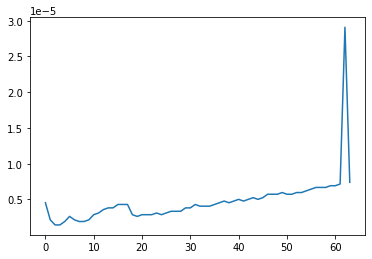

In [ ]:
logs, times = measure_performance(count_binary_ones, max_log=64, log_step=1)
plt.plot(logs, times)

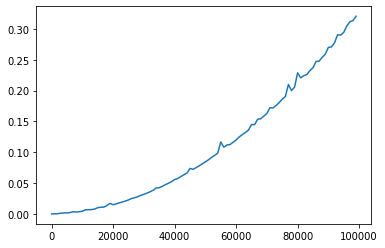

In [ ]:
logs, times = measure_performance(count_binary_ones, max_log=100000, log_step=1000)
plt.plot(logs, times)

In [ ]:
number = 17
bytearray(number.to_bytes(5, byteorder='little'))

bytearray(b'\x11\x00\x00\x00\x00')

In [ ]:
def count_binary_ones_optimal(number):
  # 0b111 = 5
  # 0b00000111
  # 0b111111111
  # 0b0000001 0b11111111  
  bytes_needed = (number.bit_length() + 7) // 8
  number_as_bytes = bytearray(number.to_bytes(bytes_needed, byteorder='big'))
  count = 0
  for byte in number_as_bytes:
    while byte:
      last_digit = byte & 0x01
      count = count + last_digit
      byte >>= 1
      
  return count

In [ ]:
x = 17
print(bin(x))
print(count_binary_ones(x))

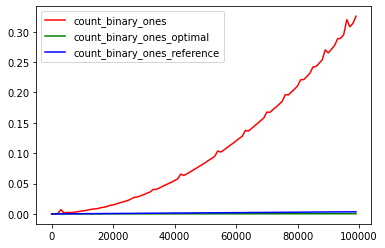

In [ ]:
algorithms = {
  count_binary_ones: 'red',
  count_binary_ones_optimal: 'green',
  count_binary_ones_reference: 'blue',
}

for algo, color in algorithms.items():
  logs, times = measure_performance(algo, max_log=100000, log_step=1000)
  plt.plot(logs, times, color=color, label=algo.__name__)
plt.legend()

In [ ]:
input()